In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("data_input/data.csv", index_col=0)
data.head()

,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
ad_id,,,,,,,,,,,,,,
708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [4]:
fb = pd.read_csv("data_input/data.csv",parse_dates=['reporting_start','reporting_end'])
fb.dtypes

ad_id                           int64
reporting_start        datetime64[ns]
reporting_end          datetime64[ns]
campaign_id                    object
fb_campaign_id                 object
age                            object
gender                         object
interest1                       int64
interest2                       int64
interest3                       int64
impressions                   float64
clicks                          int64
spent                         float64
total_conversion              float64
approved_conversion           float64
dtype: object

In [5]:
fb.iloc[:,1:3].describe().loc['first', 'reporting_end']

Timestamp('2017-08-17 00:00:00')

In [6]:
fb.iloc[:,1].max()

Timestamp('2017-08-30 00:00:00')

In [7]:
fb['reporting_start'].min().strftime(format="%d %b %Y")

'17 Aug 2017'

In [8]:
fb[fb['age'].isin(["40-44","35-39"])]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
18,709179,2017-08-30,2017-08-30,916,103988,35-39,M,15,16,17,4627.0,1,1.690000,1.0,0.0
19,709183,2017-08-30,2017-08-30,916,103989,35-39,M,16,20,22,21026.0,4,4.630000,2.0,1.0
20,709320,2017-08-17,2017-08-17,916,104012,35-39,M,15,21,20,1422.0,0,0.000000,1.0,1.0
21,709323,2017-08-17,2017-08-17,916,104012,35-39,M,15,17,19,7132.0,2,2.610000,1.0,0.0
22,709326,2017-08-18,2017-08-18,916,104013,35-39,M,16,22,22,12190.0,2,3.050000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1121572,2017-08-20,2017-08-20,1178,144619,40-44,M,2,6,3,32574.0,5,7.480000,1.0,0.0
753,1121575,2017-08-20,2017-08-20,1178,144619,40-44,M,2,4,5,128595.0,23,36.480001,1.0,1.0
754,1121577,2017-08-20,2017-08-20,1178,144620,40-44,M,7,9,11,242234.0,48,68.060001,2.0,0.0
755,1121584,2017-08-20,2017-08-20,1178,144621,40-44,M,66,67,67,33154.0,5,7.880000,1.0,1.0


In [9]:
id=['936','1178']

In [10]:
campaigns = fb[fb['campaign_id'].isin(id)]
campaigns = campaigns[campaigns.spent > 0]

In [11]:
campaigns

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,2017-08-25,2017-08-25,936,108654,30-34,M,10,16,13,13329.0,4,5.630000,1.0,1.0
56,734215,2017-08-26,2017-08-26,936,108655,30-34,M,15,19,17,13659.0,3,3.840000,1.0,0.0
60,734290,2017-08-26,2017-08-26,936,108668,30-34,M,29,32,35,5374.0,1,1.040000,4.0,0.0
63,734352,2017-08-27,2017-08-27,936,108678,35-39,M,10,11,16,4423.0,1,1.460000,1.0,1.0
64,734361,2017-08-29,2017-08-29,936,108680,35-39,M,16,19,19,12382.0,2,2.840000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1121585,2017-08-20,2017-08-20,1178,144621,40-44,M,66,72,68,9773.0,1,1.460000,1.0,0.0
757,1121589,2017-08-20,2017-08-20,1178,144622,45-49,M,10,16,11,464036.0,77,123.550000,3.0,1.0
758,1121590,2017-08-20,2017-08-20,1178,144622,45-49,M,10,16,15,478480.0,75,135.750001,3.0,1.0
759,1121592,2017-08-20,2017-08-20,1178,144622,45-49,M,10,14,11,428812.0,66,116.880000,4.0,2.0


In [12]:
fb['campaign_id'].unique()

array(['916', '936', '1178', '45-49', '30-34', '35-39', '40-44'],
      dtype=object)

In [13]:
campaigns

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,2017-08-25,2017-08-25,936,108654,30-34,M,10,16,13,13329.0,4,5.630000,1.0,1.0
56,734215,2017-08-26,2017-08-26,936,108655,30-34,M,15,19,17,13659.0,3,3.840000,1.0,0.0
60,734290,2017-08-26,2017-08-26,936,108668,30-34,M,29,32,35,5374.0,1,1.040000,4.0,0.0
63,734352,2017-08-27,2017-08-27,936,108678,35-39,M,10,11,16,4423.0,1,1.460000,1.0,1.0
64,734361,2017-08-29,2017-08-29,936,108680,35-39,M,16,19,19,12382.0,2,2.840000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1121585,2017-08-20,2017-08-20,1178,144621,40-44,M,66,72,68,9773.0,1,1.460000,1.0,0.0
757,1121589,2017-08-20,2017-08-20,1178,144622,45-49,M,10,16,11,464036.0,77,123.550000,3.0,1.0
758,1121590,2017-08-20,2017-08-20,1178,144622,45-49,M,10,16,15,478480.0,75,135.750001,3.0,1.0
759,1121592,2017-08-20,2017-08-20,1178,144622,45-49,M,10,14,11,428812.0,66,116.880000,4.0,2.0


In [14]:
campaigns['reporting_start'].min().strftime(format="%d %b %Y")

'18 Aug 2017'

In [15]:
campaigns['reporting_start'].max().strftime(format="%d %b %Y")

'30 Aug 2017'

In [16]:
int(campaigns['spent'].sum())

19470

In [17]:
int(campaigns['total_conversion'].sum())

1398

In [18]:
cpc = campaigns.groupby(['campaign_id'])[['spent','total_conversion']].sum()

In [19]:
cpc

,spent,total_conversion
campaign_id,,
1178,16577.159998,1042.0
936,2893.369999,356.0


In [20]:
cpc['CPC'] = cpc['spent']/cpc['total_conversion']

In [21]:
cpc

,spent,total_conversion,CPC
campaign_id,,,
1178,16577.159998,1042.0,15.908983
936,2893.369999,356.0,8.127444


In [22]:
from send_email import extract_summary

In [23]:
extract_summary()


{'start_date': '17 Aug 2017',
 'end_date': '30 Aug 2017',
 'total_spent': 19470,
 'total_conversion': 1398,
 'cpc': {'936': 8.13, '1178': 15.91}}

In [24]:
di=extract_summary()

In [25]:
di

{'start_date': '17 Aug 2017',
 'end_date': '30 Aug 2017',
 'total_spent': 19470,
 'total_conversion': 1398,
 'cpc': {'936': 8.13, '1178': 15.91}}

In [28]:
di['total_spent']

19470

In [85]:
def create_plot(file_path="data_input/data.csv", id=['936', '1178']):
  """   
  Fetch data from data source and export as plot
  """
  fb = pd.read_csv(file_path, parse_dates=[1,2])
  campaigns = fb[fb['campaign_id'].isin(id)]
  campaigns = campaigns[campaigns.spent > 0]

  # Create a grouped dataframe based on campaign id, age group, and reporting date
  # Calculate the total converision of each group
  grouped = campaigns.groupby(by=['campaign_id', 'age', 'reporting_start'], as_index=False)['total_conversion'].sum()

  fig = plt.figure(1, figsize=(15,6))

  # Iterate to create 1 plot campaign at a time
  for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)
    
    df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
    df['reporting_start'] = df['reporting_start'].dt.date
    pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
    pivot.plot.bar(ax=plt.gca())

  fig.suptitle('Campaign Conversion per Age Group', fontsize=20)
  fig.autofmt_xdate()

  # Save file to plot folder
  imagename = 'plot/'+date.today().strftime(format="%d %b %Y")+'.png'
  fig.savefig(imagename)
  return(imagename)

'plot/11 Aug 2020.png'

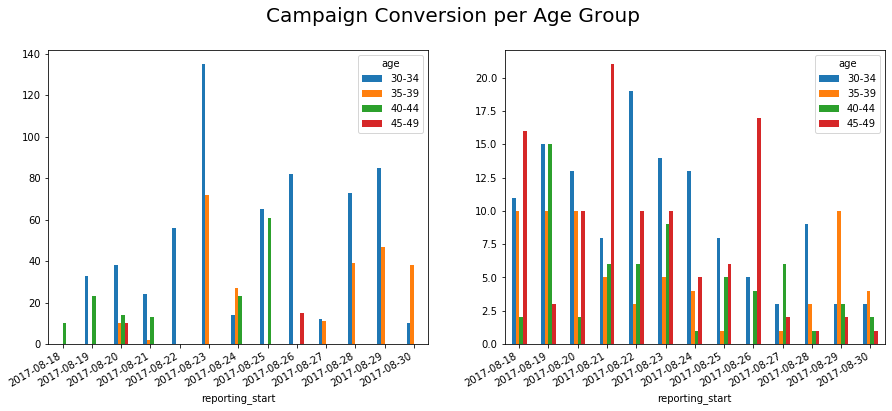

In [87]:
from datetime import date

create_plot()

In [30]:
fb = pd.read_csv("data_input/data.csv", parse_dates=[1,2])
campaigns = fb[fb['campaign_id'].isin(['936', '1178'])]
campaigns = campaigns[campaigns.spent > 0]

In [33]:
grouped = campaigns.groupby(by=['campaign_id', 'age', 'reporting_start'], as_index=False)['total_conversion'].sum()
grouped.head()

,campaign_id,age,reporting_start,total_conversion
0,1178,30-34,2017-08-19,33.0
1,1178,30-34,2017-08-20,38.0
2,1178,30-34,2017-08-21,24.0
3,1178,30-34,2017-08-22,56.0
4,1178,30-34,2017-08-23,135.0


In [34]:
for i in [1,2,3,4]:
    print(i)

1
2
3
4


In [40]:
import matplotlib.pyplot as plt

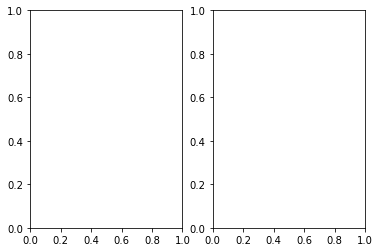

In [42]:
for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(['936','1178']), i+1)
    

In [45]:
grouped.head()

,campaign_id,age,reporting_start,total_conversion
0,1178,30-34,2017-08-19,33.0
1,1178,30-34,2017-08-20,38.0
2,1178,30-34,2017-08-21,24.0
3,1178,30-34,2017-08-22,56.0
4,1178,30-34,2017-08-23,135.0


In [61]:
df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
df['reporting_start'] = df['reporting_start'].dt.date
pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
    #pivot.plot.bar(ax=plt.gca())
df

,age,reporting_start,total_conversion
28,30-34,2017-08-18,11.0
29,30-34,2017-08-19,15.0
30,30-34,2017-08-20,13.0
31,30-34,2017-08-21,8.0
32,30-34,2017-08-22,19.0
33,30-34,2017-08-23,14.0
34,30-34,2017-08-24,13.0
35,30-34,2017-08-25,8.0
36,30-34,2017-08-26,5.0
37,30-34,2017-08-27,3.0


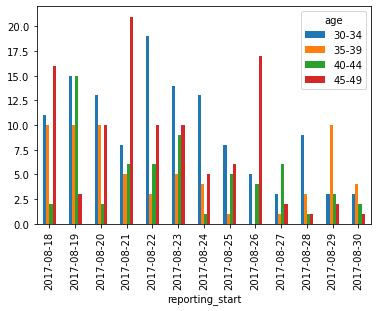

In [56]:
df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
df['reporting_start'] = df['reporting_start'].dt.date
pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
pivot.plot.bar(ax=plt.gca())

In [54]:
df.head()

,age,reporting_start,total_conversion
28,30-34,2017-08-18,11.0
29,30-34,2017-08-19,15.0
30,30-34,2017-08-20,13.0
31,30-34,2017-08-21,8.0
32,30-34,2017-08-22,19.0


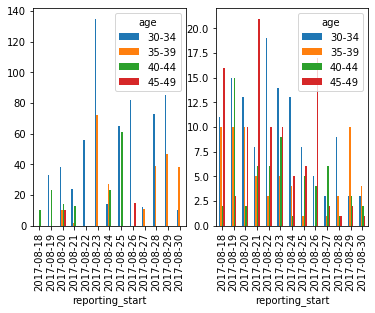

In [71]:
for i,campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)
    df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
    df['reporting_start'] = df['reporting_start'].dt.date
    pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
    pivot.plot.bar(ax=plt.gca())

In [82]:
import os

In [88]:
os.environ['EMAIL_ADDRESS']

'alfonskurniawan9@gmail.com'

In [92]:
def main(subject, \
  contact_file='contact.txt', \
  template_file='templates/body.txt', \
  data_file='data_input/data.csv'):
  """   
  Main function for application
  """

In [98]:
total_conversion = int (campaigns['total_conversion'])

TypeError: cannot convert the series to <class 'int'>